In [90]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import scipy as sp

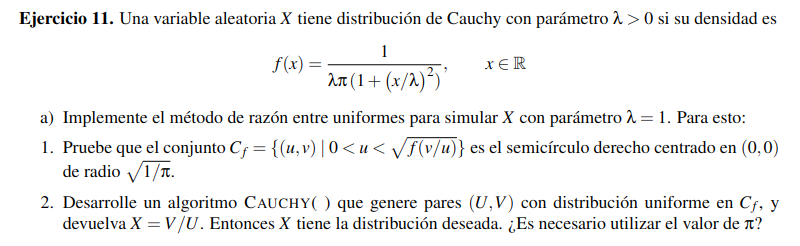

El rectanculo que contiene al semicirculo centrado en (0,0) y radio $\sqrt{1/\pi}$ es:
$$
(0, \sqrt{1/\pi}) \times ( -\sqrt{1/\pi}, \sqrt{1/\pi} )
$$

Por lo tanto el algoritmo consistira de generar dos valores de una uniforme en ese rectangulo y ver si U^2 < f(V/U) y si es asi devuelvo X = V/U.

En realidad lo que necesito es saber si ese u,v esta en el semicirculo. Para eso necesito que $u^2 + v^2 \leq 1/\sqrt{\pi}$.

In [91]:
def f_X(x):
    d = np.pi * (1 + x**2)

    return 1/d

def cauchy():
    while True:
        u = rd.uniform(0, 1/np.pi**(0.5))
        v = rd.uniform(-(1/np.pi**(0.5)), 1/np.pi**(0.5))

        if u**2 + v**2 <= 1.0/np.sqrt(np.pi):
            return float(v/u)

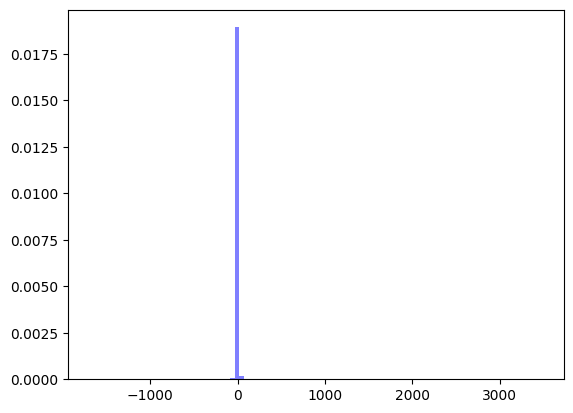

In [92]:
# genero valores de mi cauchy 
nsims = 10000

v_gen = [cauchy() for i in range(nsims)]

# genero valores con la libreria scipy
v_sp = sp.stats.cauchy.rvs(size=nsims)

plt.hist(v_gen, bins=100, density=True, alpha=0.5, color='b')

plt.show()

Si X distribuye C(1), entonces $\lambda$ X distribuye C($\lambda$) por lo tanto para generar esta nueva C con parametro $\lambda$ con el metodo de razon entre uniformes. El nuevo rectanculo $C_f$ queda compuesto por:

$$
\frac{1}{\sqrt{\lambda \pi}} \gt \sqrt{u^2 + (v/\lambda)^2}
$$


[desarrollo](./practico5_annotated.pdf)

Por lo que el nuevo algoritmo solamente requiere de calcular un valor de C(1) y multiplicarlo por $\lambda$.

In [95]:
def cauchy_p(lamda):
    while True:
        u = rd.uniform(0, 1/np.pi**(0.5))
        v = rd.uniform(-(1/np.pi**(0.5)), 1/np.pi**(0.5))

        if u**2 + v**2 <= 1.0/np.sqrt(np.pi):
            return float(v/u)*lamda

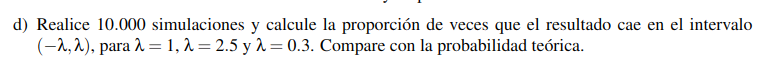

In [101]:
lamdas = [1, 2.5, 0.3]

exitos = [0, 0, 0]

nsims = 10000

for i in range(len(lamdas)):
    for j in range(nsims):
        if -lamdas[i] < cauchy_p(lamdas[i]) < lamdas[i]:
            exitos[i] += 1

print(f"probabilidad lambda = 1: {exitos[0]/nsims}")
print(f"probabilidad lambda = 2.5: {exitos[1]/nsims}")
print(f"probabilidad lambda = 0.3: {exitos[2]/nsims}")

probabilidad lambda = 1: 0.4952
probabilidad lambda = 2.5: 0.4985
probabilidad lambda = 0.3: 0.5021


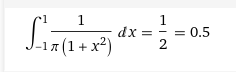
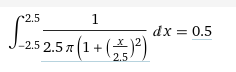
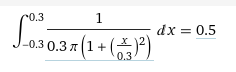